In [1]:
from IPython.display import display, Markdown
import numpy as np
def set_frame_style(df, caption="", font_size ='20px' ):
    random_list = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap=random_list[np.random.randint(1,17)]).set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Brown'),
        ('font-size', font_size),
        ('font-weight','bold')
    ]}])

In [2]:
import pandas as pd
syn_df= pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv')
original_df = pd.read_csv('/kaggle/input/cirrhosis-patient-survival-prediction/cirrhosis.csv')

test_df = pd.read_csv('/kaggle/input/playground-series-s3e26/test.csv')
ids = test_df['id']
syn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [3]:
original_df.columns = ['id', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage']

In [4]:
set_frame_style(syn_df.head(),'Synthetically Generated Data\n')

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.300000,316.000000,3.350000,172.000000,1601.000000,179.800000,63.000000,394.000000,9.700000,3.000000,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.900000,364.000000,3.540000,63.000000,1440.000000,134.850000,88.000000,361.000000,11.000000,3.000000,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.300000,299.000000,3.550000,131.000000,1029.000000,119.350000,50.000000,199.000000,11.700000,4.000000,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.600000,256.000000,3.500000,58.000000,1653.000000,71.300000,96.000000,269.000000,10.700000,3.000000,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.100000,346.000000,3.650000,63.000000,1181.000000,125.550000,96.000000,298.000000,10.600000,4.000000,C


In [5]:
set_frame_style(original_df.head(),'Original Data\n')

,id,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.500000,261.000000,2.600000,156.000000,1718.000000,137.950000,172.000000,190.000000,12.200000,4.000000
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.100000,302.000000,4.140000,54.000000,7394.800000,113.520000,88.000000,221.000000,10.600000,3.000000
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.400000,176.000000,3.480000,210.000000,516.000000,96.100000,55.000000,151.000000,12.000000,4.000000
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.800000,244.000000,2.540000,64.000000,6121.800000,60.630000,92.000000,183.000000,10.300000,4.000000
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.400000,279.000000,3.530000,143.000000,671.000000,113.150000,72.000000,136.000000,10.900000,3.000000


In [6]:
from prettytable import PrettyTable


table = PrettyTable()
table.field_names = ["Features","Unique Values"]
for i in list(syn_df.columns) :
    nunique =syn_df[str(i)].nunique
    table.add_row([i, f"{nunique()}"])
print('Unique values in synthetically generated dataset : \n')
print(table)

Unique values in synthetically generated dataset : 

+---------------+---------------+
|    Features   | Unique Values |
+---------------+---------------+
|       id      |      7905     |
|     N_Days    |      461      |
|      Drug     |       2       |
|      Age      |      391      |
|      Sex      |       2       |
|    Ascites    |       2       |
|  Hepatomegaly |       2       |
|    Spiders    |       2       |
|     Edema     |       3       |
|   Bilirubin   |      111      |
|  Cholesterol  |      226      |
|    Albumin    |      160      |
|     Copper    |      171      |
|    Alk_Phos   |      364      |
|      SGOT     |      206      |
| Tryglicerides |      154      |
|   Platelets   |      227      |
|  Prothrombin  |       49      |
|     Stage     |       4       |
|     Status    |       3       |
+---------------+---------------+


In [7]:
from prettytable import PrettyTable


table = PrettyTable()
table.field_names = ["Features","Unique Values"]
for i in list(original_df.columns) :
    nunique =original_df[str(i)].nunique
    table.add_row([i, f"{nunique()}"])
print('Unique values in original dataset : \n')
print(table)

Unique values in original dataset : 

+---------------+---------------+
|    Features   | Unique Values |
+---------------+---------------+
|       id      |      418      |
|     N_Days    |      399      |
|     Status    |       3       |
|      Drug     |       2       |
|      Age      |      344      |
|      Sex      |       2       |
|    Ascites    |       2       |
|  Hepatomegaly |       2       |
|    Spiders    |       2       |
|     Edema     |       3       |
|   Bilirubin   |       98      |
|  Cholesterol  |      201      |
|    Albumin    |      154      |
|     Copper    |      158      |
|    Alk_Phos   |      295      |
|      SGOT     |      179      |
| Tryglicerides |      146      |
|   Platelets   |      243      |
|  Prothrombin  |       48      |
|     Stage     |       4       |
+---------------+---------------+


In [8]:
df = pd.concat([syn_df,original_df], axis =0)

df = df.dropna()
df = df.sample(frac = 1).reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8181 entries, 0 to 8180
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             8181 non-null   int64  
 1   N_Days         8181 non-null   int64  
 2   Drug           8181 non-null   object 
 3   Age            8181 non-null   int64  
 4   Sex            8181 non-null   object 
 5   Ascites        8181 non-null   object 
 6   Hepatomegaly   8181 non-null   object 
 7   Spiders        8181 non-null   object 
 8   Edema          8181 non-null   object 
 9   Bilirubin      8181 non-null   float64
 10  Cholesterol    8181 non-null   float64
 11  Albumin        8181 non-null   float64
 12  Copper         8181 non-null   float64
 13  Alk_Phos       8181 non-null   float64
 14  SGOT           8181 non-null   float64
 15  Tryglicerides  8181 non-null   float64
 16  Platelets      8181 non-null   float64
 17  Prothrombin    8181 non-null   float64
 18  Stage   

In [9]:
def convert_days_to_years(age_in_days):
    days_in_year = 365.25
    age_in_years = age_in_days / days_in_year
    return age_in_years


def add_cols(df):
        age = list(df.Age)
        age_in_year = []
        for i in age :
            age_in_year.append(int(convert_days_to_years(i)))
        df['Age_in_year'] = pd.Series(age_in_year)
        return df
df = add_cols(df)
original_df = add_cols(original_df)
set_frame_style(df.head())

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Age_in_year
0,6172,1212,Placebo,13913,F,N,Y,N,N,3.500000,373.000000,3.340000,42.000000,1391.000000,120.900000,137.000000,268.000000,11.500000,4.000000,C,38
1,2746,2573,Placebo,15031,F,N,Y,N,N,1.400000,434.000000,3.600000,41.000000,1052.000000,128.650000,100.000000,275.000000,11.000000,4.000000,CL,41
2,2751,769,Placebo,19060,F,N,Y,N,N,3.800000,426.000000,3.150000,143.000000,2716.000000,144.150000,113.000000,275.000000,10.600000,4.000000,D,52
3,6911,2443,D-penicillamine,20483,F,N,Y,N,N,0.900000,436.000000,2.970000,45.000000,3681.000000,170.500000,185.000000,381.000000,9.900000,4.000000,C,56
4,7814,1216,Placebo,13178,F,N,Y,N,N,3.200000,608.000000,3.310000,65.000000,1790.000000,151.900000,210.000000,149.000000,10.800000,4.000000,D,36


In [10]:
threshold_platelets = 150
df['thrombocytopenia'] = np.where(df['Platelets'] < threshold_platelets, 1, 0)
test_df['thrombocytopenia'] = np.where(test_df['Platelets'] < threshold_platelets, 1, 0)

In [12]:
threshold_alk_phos_upper = 147  # Upper limit of normal range
threshold_alk_phos_lower = 44   # Lower limit of normal range

df['elevated_alk_phos'] = np.where((df['Alk_Phos'] > threshold_alk_phos_upper) | (df['Alk_Phos'] < threshold_alk_phos_lower), 1, 0)
test_df['elevated_alk_phos'] = np.where((test_df['Alk_Phos'] > threshold_alk_phos_upper) | (test_df['Alk_Phos'] < threshold_alk_phos_lower), 1, 0)


In [13]:
normal_copper_range = (62, 140)

df['normal_copper'] = np.where((df['Copper'] >= normal_copper_range[0]) & (df['Copper'] <= normal_copper_range[1]), 1, 0)
test_df['normal_copper'] = np.where((test_df['Copper'] >= normal_copper_range[0]) & (test_df['Copper'] <= normal_copper_range[1]), 1, 0)


In [14]:
normal_albumin_range = (3.4, 5.4)

df['normal_albumin'] = np.where((df['Albumin'] >= normal_albumin_range[0]) & (df['Albumin'] <= normal_albumin_range[1]), 1, 0)

test_df['normal_albumin'] = np.where((test_df['Albumin'] >= normal_albumin_range[0]) & (test_df['Albumin'] <= normal_albumin_range[1]), 1, 0)


In [15]:
normal_bilirubin_range = (0.2, 1.2)

df['normal_bilirubin'] = np.where((df['Bilirubin'] >= normal_bilirubin_range[0]) & (df['Bilirubin'] <= normal_bilirubin_range[1]), 1, 0)
test_df['normal_bilirubin'] = np.where((test_df['Bilirubin'] >= normal_bilirubin_range[0]) & (test_df['Bilirubin'] <= normal_bilirubin_range[1]), 1, 0)


In [16]:
set_frame_style(df.head())

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Age_in_year,thrombocytopenia,elevated_alk_phos,normal_copper,normal_albumin,normal_bilirubin
0,6172,1212,Placebo,13913,F,N,Y,N,N,3.500000,373.000000,3.340000,42.000000,1391.000000,120.900000,137.000000,268.000000,11.500000,4.000000,C,38,0,1,0,0,0
1,2746,2573,Placebo,15031,F,N,Y,N,N,1.400000,434.000000,3.600000,41.000000,1052.000000,128.650000,100.000000,275.000000,11.000000,4.000000,CL,41,0,1,0,1,0
2,2751,769,Placebo,19060,F,N,Y,N,N,3.800000,426.000000,3.150000,143.000000,2716.000000,144.150000,113.000000,275.000000,10.600000,4.000000,D,52,0,1,0,0,0
3,6911,2443,D-penicillamine,20483,F,N,Y,N,N,0.900000,436.000000,2.970000,45.000000,3681.000000,170.500000,185.000000,381.000000,9.900000,4.000000,C,56,0,1,0,0,1
4,7814,1216,Placebo,13178,F,N,Y,N,N,3.200000,608.000000,3.310000,65.000000,1790.000000,151.900000,210.000000,149.000000,10.800000,4.000000,D,36,1,1,1,0,0


In [17]:
numeric_cols= ['N_Days',  'Age',  'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
test_to_scale = test_df[numeric_cols]
train_to_scale = df[numeric_cols]
set_frame_style(train_to_scale.head(), 'Features with continuous values')
train_to_scale_original = original_df[numeric_cols]

In [18]:
from plotly.subplots import make_subplots
import random
import plotly.graph_objects as go
columns = list(train_to_scale.columns)

ultra_light_colors = [
"#F0F8FF", "#F6F6F6", "#F0FFF0",  "#FAFAD2",  "#FFE4E1",  "#FFF5EE", "#F5FFFA",  "#F0FFFF","#FFFAF0",  "#F8F8FF"   
]
fig = make_subplots(rows=len(columns), cols=2)
count = 0
for row in range(int(len(columns))) : 
    random_col = f"RGB({random.randint(100, 255)}, {random.randint(100, 255)}, {random.randint(150, 255)})"
    fig.add_trace(go.Violin(y=syn_df[numeric_cols][columns[count]], x0 = columns[count], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor=random_col, opacity=0.6,), row=row + 1, col= 1)
    fig.add_trace(go.Violin(y= train_to_scale_original[columns[count]],x0 = columns[count], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor=random_col, opacity=0.6,), row=row + 1, col= 2)
 
    
    count +=1


fig.update_layout(height=2600, width=1000, title_text="Feature Distribution in Synthetic (Left) vs Original Dataset (Right)",showlegend=False,paper_bgcolor= '#F5F5F5')
fig.show()

In [19]:
set_frame_style(pd.DataFrame(df.Status.value_counts()), 'Data points per class', '15px')

,count
Status,
C,5112
D,2776
CL,293


In [20]:
classes = list(df.Status.unique())

ultra_light_colors = [
"#F0F8FF", "#F6F6F6", "#F0FFF0",  "#FAFAD2",  "#FFE4E1",  "#FFF5EE", "#F5FFFA",  "#F0FFFF","#FFFAF0",  "#F8F8FF"   
]
def col_per_class(col):
    fig = go.Figure()
    for clas in classes : 
        fig.add_trace(go.Violin(y = df[col][df['Status']== clas],   box_visible=True,
                            meanline_visible=True , x = df['Status'][df['Status'] == clas], name = clas ))
        fig.update_layout(title = f'Distribution for {col} for each class', plot_bgcolor = ultra_light_colors[np.random.randint(1,10)],paper_bgcolor= '#F5F5F5', height=400,  
        width=1000 )
    return fig
for i in train_to_scale : 
    fig = col_per_class(i)
    fig.show()

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3



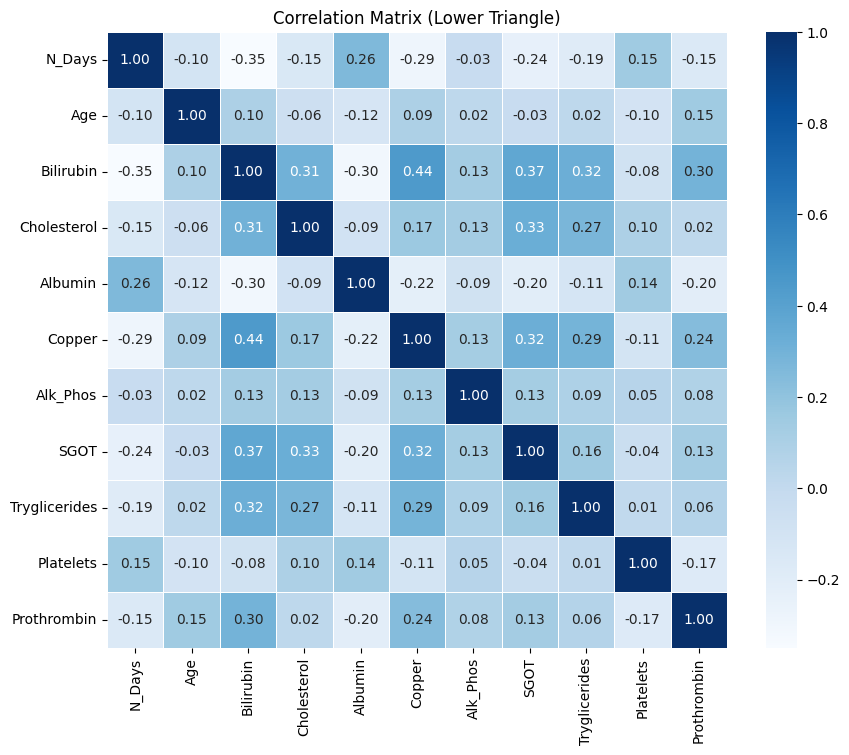

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = train_to_scale.corr()

# Create a heatmap with masked upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix (Lower Triangle)')
plt.show()

In [22]:
set_frame_style(df.head())

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,Age_in_year,thrombocytopenia,elevated_alk_phos,normal_copper,normal_albumin,normal_bilirubin
0,6172,1212,Placebo,13913,F,N,Y,N,N,3.500000,373.000000,3.340000,42.000000,1391.000000,120.900000,137.000000,268.000000,11.500000,4.000000,C,38,0,1,0,0,0
1,2746,2573,Placebo,15031,F,N,Y,N,N,1.400000,434.000000,3.600000,41.000000,1052.000000,128.650000,100.000000,275.000000,11.000000,4.000000,CL,41,0,1,0,1,0
2,2751,769,Placebo,19060,F,N,Y,N,N,3.800000,426.000000,3.150000,143.000000,2716.000000,144.150000,113.000000,275.000000,10.600000,4.000000,D,52,0,1,0,0,0
3,6911,2443,D-penicillamine,20483,F,N,Y,N,N,0.900000,436.000000,2.970000,45.000000,3681.000000,170.500000,185.000000,381.000000,9.900000,4.000000,C,56,0,1,0,0,1
4,7814,1216,Placebo,13178,F,N,Y,N,N,3.200000,608.000000,3.310000,65.000000,1790.000000,151.900000,210.000000,149.000000,10.800000,4.000000,D,36,1,1,1,0,0


In [23]:
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()


scaled_train = pd.DataFrame(sc.fit_transform(train_to_scale),columns = train_to_scale.columns)
scaled_test = pd.DataFrame(sc.transform(test_to_scale),columns = test_to_scale.columns)

In [24]:
set_frame_style(scaled_train.head())

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,-0.424263,-0.936986,1.043478,0.513889,-0.571429,-0.333333,0.205279,0.200000,0.600000,0.028302,0.900000
1,0.508568,-0.718200,0.130435,0.937500,0.047619,-0.349206,-0.126100,0.325000,-0.072727,0.094340,0.400000
2,-0.727896,0.070254,1.173913,0.881944,-1.023810,1.269841,1.500489,0.575000,0.163636,0.094340,0.000000
3,0.419465,0.348728,-0.086957,0.951389,-1.452381,-0.285714,2.443793,1.000000,1.472727,1.094340,-0.700000
4,-0.421522,-1.080822,0.913043,2.145833,-0.642857,0.031746,0.595308,0.700000,1.927273,-1.094340,0.200000


In [25]:
train_ohe = df.drop(numeric_cols, axis =1)
train_to_ohe = train_ohe.drop(['id','Age_in_year','Status'], axis =1)
test_ohe = test_df.drop(numeric_cols, axis =1)
test_to_ohe = test_ohe.drop(['id'],axis =1)
set_frame_style(train_to_ohe.head())

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage,thrombocytopenia,elevated_alk_phos,normal_copper,normal_albumin,normal_bilirubin
0,Placebo,F,N,Y,N,N,4.000000,0,1,0,0,0
1,Placebo,F,N,Y,N,N,4.000000,0,1,0,1,0
2,Placebo,F,N,Y,N,N,4.000000,0,1,0,0,0
3,D-penicillamine,F,N,Y,N,N,4.000000,0,1,0,0,1
4,Placebo,F,N,Y,N,N,4.000000,1,1,1,0,0


In [26]:
set_frame_style(test_to_ohe.head())

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage,thrombocytopenia,elevated_alk_phos,normal_copper,normal_albumin,normal_bilirubin
0,D-penicillamine,F,N,Y,N,N,2.000000,0,1,1,0,1
1,D-penicillamine,F,N,N,N,N,2.000000,0,1,1,1,1
2,Placebo,F,N,Y,N,Y,4.000000,0,1,0,0,0
3,D-penicillamine,F,N,N,N,N,2.000000,0,1,0,1,1
4,D-penicillamine,F,N,Y,N,N,1.000000,0,1,1,0,0


In [27]:
ohe_train = pd.get_dummies(train_to_ohe, columns =train_to_ohe.columns )
ohe_test  = pd.get_dummies(test_to_ohe, columns = train_to_ohe.columns)
ohe_train = ohe_train.replace({True: 1, False: 0})
ohe_test = ohe_test.replace({True: 1, False: 0})
set_frame_style(ohe_train.head())

,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0,thrombocytopenia_0,thrombocytopenia_1,elevated_alk_phos_1,normal_copper_0,normal_copper_1,normal_albumin_0,normal_albumin_1,normal_bilirubin_0,normal_bilirubin_1
0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,1,0
1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,0
2,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,1,0
3,1,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,1
4,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,1,0,1,1,0,1,0


In [28]:
train_df_1 = pd.concat([ohe_train, scaled_train], axis =1)
test_df = pd.concat([ohe_test, scaled_test], axis =1)
set_frame_style(train_df_1.head())

,Drug_D-penicillamine,Drug_Placebo,Sex_F,Sex_M,Ascites_N,Ascites_Y,Hepatomegaly_N,Hepatomegaly_Y,Spiders_N,Spiders_Y,Edema_N,Edema_S,Edema_Y,Stage_1.0,Stage_2.0,Stage_3.0,Stage_4.0,thrombocytopenia_0,thrombocytopenia_1,elevated_alk_phos_1,normal_copper_0,normal_copper_1,normal_albumin_0,normal_albumin_1,normal_bilirubin_0,normal_bilirubin_1,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,1,0,-0.424263,-0.936986,1.043478,0.513889,-0.571429,-0.333333,0.205279,0.200000,0.600000,0.028302,0.900000
1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,0,0.508568,-0.718200,0.130435,0.937500,0.047619,-0.349206,-0.126100,0.325000,-0.072727,0.094340,0.400000
2,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,1,0,-0.727896,0.070254,1.173913,0.881944,-1.023810,1.269841,1.500489,0.575000,0.163636,0.094340,0.000000
3,1,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,0,1,0,0,1,0.419465,0.348728,-0.086957,0.951389,-1.452381,-0.285714,2.443793,1.000000,1.472727,1.094340,-0.700000
4,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,1,0,1,1,0,1,0,-0.421522,-1.080822,0.913043,2.145833,-0.642857,0.031746,0.595308,0.700000,1.927273,-1.094340,0.200000


In [29]:
train_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8181 entries, 0 to 8180
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Drug_D-penicillamine  8181 non-null   int64  
 1   Drug_Placebo          8181 non-null   int64  
 2   Sex_F                 8181 non-null   int64  
 3   Sex_M                 8181 non-null   int64  
 4   Ascites_N             8181 non-null   int64  
 5   Ascites_Y             8181 non-null   int64  
 6   Hepatomegaly_N        8181 non-null   int64  
 7   Hepatomegaly_Y        8181 non-null   int64  
 8   Spiders_N             8181 non-null   int64  
 9   Spiders_Y             8181 non-null   int64  
 10  Edema_N               8181 non-null   int64  
 11  Edema_S               8181 non-null   int64  
 12  Edema_Y               8181 non-null   int64  
 13  Stage_1.0             8181 non-null   int64  
 14  Stage_2.0             8181 non-null   int64  
 15  Stage_3.0            

In [30]:
train_df_1.shape

(8181, 37)

In [31]:
from imblearn.under_sampling import TomekLinks
    
def tomek_links (X,y) : 
    '''Tomek Links are pairs of instances, one from the majority class and one from the minority class,
    that are very close to each other in the feature space. They are used in the context of dealing with
    imbalanced datasets to help balance the class distribution. The key idea is to 
    identify and remove those majority class instances that are near the minority class instances'''

    tl = TomekLinks(sampling_strategy='auto')

    X_resampled, y_resampled = tl.fit_resample(X, y)
    
    return X_resampled , y_resampled

In [32]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import log_loss

X = train_df_1
y = df['Status']

# Label encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X, y_encoded = tomek_links(X, y_encoded)

xgb_params ={'max_depth': 10,
         'min_child_weight': 7,
         'learning_rate': 0.03419253503641095,
         'n_estimators': 472, 
         'subsample': 0.8843005833909504,
         'colsample_bytree': 0.0966352677605082,
         'random_state': 42, 
         'tree_method': 'hist', 
        'eval_metric': 'mlogloss', 
          'device' : 'cuda',
        'verbosity': 2, }

# number of folds
n_splits = 12

#  StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

#  cross-validation results
cv_results = []

# stratified k-fold cross-validation
for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y_encoded)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]


    # XGBoost model
    xgb_model = XGBClassifier(**xgb_params )

    xgb_model.fit(X_train, y_train )

    # predictions on the validation set
    y_val_pred_prob = xgb_model.predict_proba(X_val)

    # Evaluating the model
    logloss = log_loss(y_val, y_val_pred_prob)
    print(f'Fold {fold + 1}, Logarithmic Loss on Validation Set: {logloss}')

    # results
    cv_results.append(logloss)

# average cross-validation result
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage Logarithmic Loss across {n_splits} folds: {average_cv_result}')

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning:

[12:16:28] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.




Fold 1, Logarithmic Loss on Validation Set: 0.3724370359571616
Fold 2, Logarithmic Loss on Validation Set: 0.37107471532656233
Fold 3, Logarithmic Loss on Validation Set: 0.4040778934965352
Fold 4, Logarithmic Loss on Validation Set: 0.37758832605558695
Fold 5, Logarithmic Loss on Validation Set: 0.3381253400403021
Fold 6, Logarithmic Loss on Validation Set: 0.36953417973325825
Fold 7, Logarithmic Loss on Validation Set: 0.3952065010232943
Fold 8, Logarithmic Loss on Validation Set: 0.394878786656693
Fold 9, Logarithmic Loss on Validation Set: 0.35907574743344695
Fold 10, Logarithmic Loss on Validation Set: 0.37520086453929413
Fold 11, Logarithmic Loss on Validation Set: 0.35981042818124925
Fold 12, Logarithmic Loss on Validation Set: 0.39967207682802525

Average Logarithmic Loss across 12 folds: 0.3763901579392841


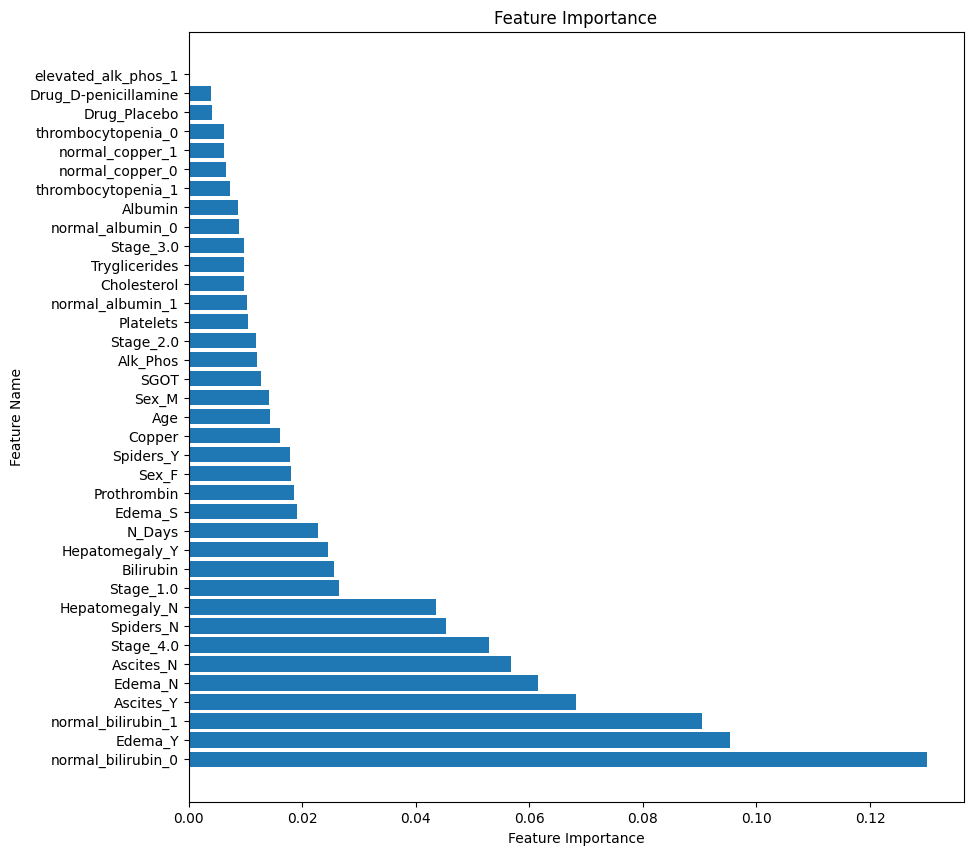

In [33]:
import matplotlib.pyplot as plt
feature_importances = xgb_model.feature_importances_
feature_names = train_df_1.columns 
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_importance_scores = zip(*sorted_feature_importance)
plt.figure(figsize=(10, 10))

plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance")
plt.show()

In [34]:
train_df_1.columns

Index(['Drug_D-penicillamine', 'Drug_Placebo', 'Sex_F', 'Sex_M', 'Ascites_N',
       'Ascites_Y', 'Hepatomegaly_N', 'Hepatomegaly_Y', 'Spiders_N',
       'Spiders_Y', 'Edema_N', 'Edema_S', 'Edema_Y', 'Stage_1.0', 'Stage_2.0',
       'Stage_3.0', 'Stage_4.0', 'thrombocytopenia_0', 'thrombocytopenia_1',
       'elevated_alk_phos_1', 'normal_copper_0', 'normal_copper_1',
       'normal_albumin_0', 'normal_albumin_1', 'normal_bilirubin_0',
       'normal_bilirubin_1', 'N_Days', 'Age', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin'],
      dtype='object')

In [35]:
import lightgbm as lgb
from sklearn.metrics import log_loss
from lightgbm import LGBMClassifier

lgbm_params = {'objective': 'multi_logloss', 
               'max_depth': 9, 'min_child_samples': 14, 
               'learning_rate': 0.034869481921747415, 
               'n_estimators': 274, 'min_child_weight': 9, 
               'subsample': 0.7717873512945741, 
               'colsample_bytree': 0.1702910221565107, 
               'reg_alpha': 0.10626128775335533, 
               'reg_lambda': 0.624196407787772, 
               'random_state': 42}

# folds
n_splits = 12

# StratifiedKFold
stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

cv_results = []

for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y_encoded)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]

    lgbm_model = LGBMClassifier(**lgbm_params)
    lgbm_model.fit(X_train,y_train)

    y_val_pred_prob = lgbm_model.predict_proba(X_val)

    logloss = log_loss(y_val, y_val_pred_prob)
    print(f'Fold {fold + 1}, Logarithmic Loss on Validation Set: {logloss}')

    cv_results.append(logloss)
average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage Logarithmic Loss across {n_splits} folds: {average_cv_result}')

/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning:

You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.



Fold 1, Logarithmic Loss on Validation Set: 0.38487449477824004
Fold 2, Logarithmic Loss on Validation Set: 0.37370070364647884
Fold 3, Logarithmic Loss on Validation Set: 0.4100410989252774
Fold 4, Logarithmic Loss on Validation Set: 0.38042581738131115
Fold 5, Logarithmic Loss on Validation Set: 0.3338187784901382
Fold 6, Logarithmic Loss on Validation Set: 0.37356108942515337
Fold 7, Logarithmic Loss on Validation Set: 0.3894324968086606
Fold 8, Logarithmic Loss on Validation Set: 0.3928051930091161
Fold 9, Logarithmic Loss on Validation Set: 0.35753118221908786
Fold 10, Logarithmic Loss on Validation Set: 0.37662373693627255
Fold 11, Logarithmic Loss on Validation Set: 0.357291618682248
Fold 12, Logarithmic Loss on Validation Set: 0.40702662494469016

Average Logarithmic Loss across 12 folds: 0.3780944029372228


In [36]:
from catboost import CatBoostClassifier
catboost_params = {'iterations': 469,
                   'depth': 20, 
                   'min_data_in_leaf': 11,
                   'learning_rate': 0.13812945166006543, 
                   'grow_policy': 'Lossguide',
                   'bootstrap_type' : 'Bernoulli'}

n_splits = 12

stratkf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)


cv_results = []


for fold, (train_idx, val_idx) in enumerate(stratkf.split(X, y_encoded)):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y_encoded[train_idx], y_encoded[val_idx]

    cat_model = CatBoostClassifier(**catboost_params, 
                            random_state=42, verbose =0
                           )
    cat_model.fit(X_train,y_train)

 
    y_val_pred_prob = cat_model.predict_proba(X_val)

    logloss = log_loss(y_val, y_val_pred_prob)
    print(f'Fold {fold + 1}, Logarithmic Loss on Validation Set: {logloss}')

 
    cv_results.append(logloss)

average_cv_result = sum(cv_results) / n_splits
print(f'\nAverage Logarithmic Loss across {n_splits} folds: {average_cv_result}')

Fold 1, Logarithmic Loss on Validation Set: 0.40603094465597117
Fold 2, Logarithmic Loss on Validation Set: 0.39641136063019483
Fold 3, Logarithmic Loss on Validation Set: 0.44992266316146284
Fold 4, Logarithmic Loss on Validation Set: 0.4041868640448524
Fold 5, Logarithmic Loss on Validation Set: 0.34445872343745226
Fold 6, Logarithmic Loss on Validation Set: 0.37923796292872664
Fold 7, Logarithmic Loss on Validation Set: 0.425405894228448
Fold 8, Logarithmic Loss on Validation Set: 0.39874056789679185
Fold 9, Logarithmic Loss on Validation Set: 0.3866921091702442
Fold 10, Logarithmic Loss on Validation Set: 0.3835269652784784
Fold 11, Logarithmic Loss on Validation Set: 0.3605243687637817
Fold 12, Logarithmic Loss on Validation Set: 0.40140937975130286

Average Logarithmic Loss across 12 folds: 0.3947123169956423


In [37]:
from sklearn.ensemble import VotingClassifier

Ensemble = VotingClassifier(estimators = [('lgb', lgbm_model), ('xgb', xgb_model), ('CB', cat_model)], 
                            voting='soft',
                            weights = [0.45,0.5,0.05]   #Adjust weighting since XGB performs better in local environment
                            )
Ensemble.fit(X, y_encoded)

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(colsample_bytree=0.1702910221565107,
                                             learning_rate=0.034869481921747415,
                                             max_depth=9, min_child_samples=14,
                                             min_child_weight=9,
                                             n_estimators=274,
                                             objective='multi_logloss',
                                             random_state=42,
                                             reg_alpha=0.10626128775335533,
                                             reg_lambda=0.624196407787772,
                                             subsample=0.7717873512945741)),
                             ('xgb',
                              XGBClassifier(base_s...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None, min_child_weight=7,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=472, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('CB',
                              <catboost.core.CatBoostClassifier object at 0x7ca96a8fbf40>)],
                 voting='soft', weights=[0.45, 0.5, 0.05])

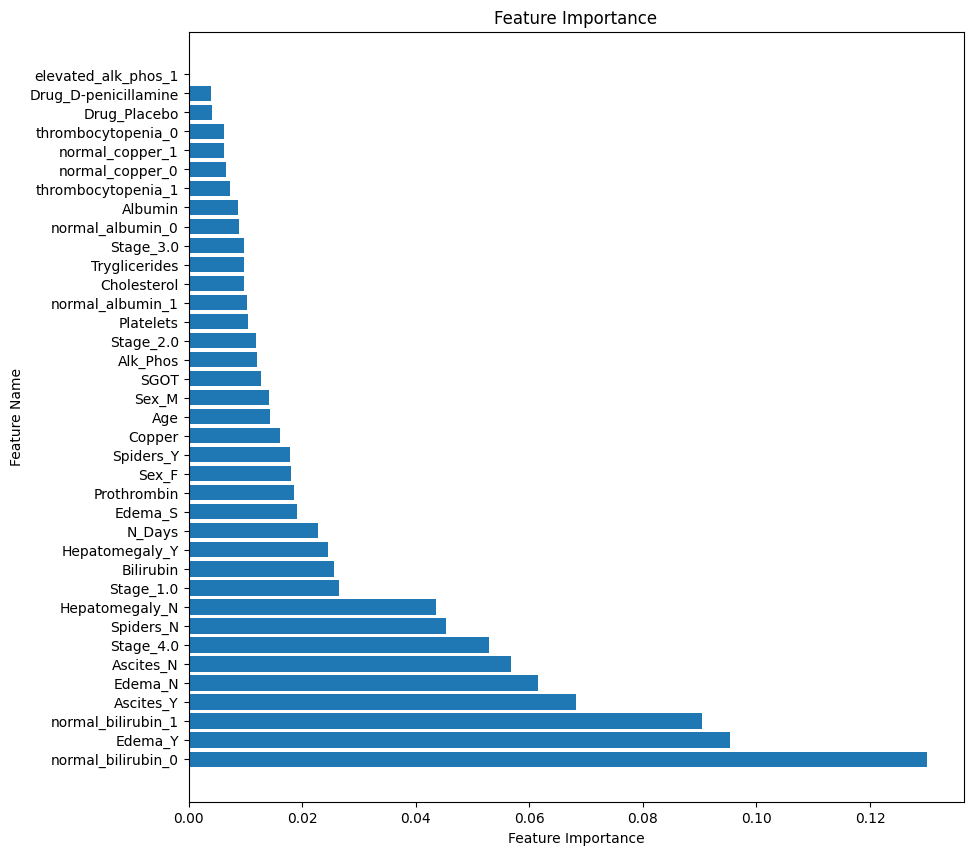

In [38]:
import matplotlib.pyplot as plt
feature_importances = xgb_model.feature_importances_
feature_names = train_df_1.columns 
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_importance_scores = zip(*sorted_feature_importance)
plt.figure(figsize=(10, 10))

plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance")
plt.show()

In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Drug_D-penicillamine  5271 non-null   int64  
 1   Drug_Placebo          5271 non-null   int64  
 2   Sex_F                 5271 non-null   int64  
 3   Sex_M                 5271 non-null   int64  
 4   Ascites_N             5271 non-null   int64  
 5   Ascites_Y             5271 non-null   int64  
 6   Hepatomegaly_N        5271 non-null   int64  
 7   Hepatomegaly_Y        5271 non-null   int64  
 8   Spiders_N             5271 non-null   int64  
 9   Spiders_Y             5271 non-null   int64  
 10  Edema_N               5271 non-null   int64  
 11  Edema_S               5271 non-null   int64  
 12  Edema_Y               5271 non-null   int64  
 13  Stage_1.0             5271 non-null   int64  
 14  Stage_2.0             5271 non-null   int64  
 15  Stage_3.0            

In [40]:
train_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8181 entries, 0 to 8180
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Drug_D-penicillamine  8181 non-null   int64  
 1   Drug_Placebo          8181 non-null   int64  
 2   Sex_F                 8181 non-null   int64  
 3   Sex_M                 8181 non-null   int64  
 4   Ascites_N             8181 non-null   int64  
 5   Ascites_Y             8181 non-null   int64  
 6   Hepatomegaly_N        8181 non-null   int64  
 7   Hepatomegaly_Y        8181 non-null   int64  
 8   Spiders_N             8181 non-null   int64  
 9   Spiders_Y             8181 non-null   int64  
 10  Edema_N               8181 non-null   int64  
 11  Edema_S               8181 non-null   int64  
 12  Edema_Y               8181 non-null   int64  
 13  Stage_1.0             8181 non-null   int64  
 14  Stage_2.0             8181 non-null   int64  
 15  Stage_3.0            

In [41]:
y_pred = xgb_model.predict_proba(test_df)
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['Status_C', 'Status_CL','Status_D']
y_pred.head()

,Status_C,Status_CL,Status_D
0,0.608328,0.028360,0.363312
1,0.605803,0.192053,0.202144
2,0.036763,0.008046,0.955191
3,0.984106,0.004808,0.011086
4,0.820461,0.089030,0.090509


In [42]:
submission_df = pd.DataFrame()
submission_df = y_pred
submission_df['id'] = ids
submission_df.head()

,Status_C,Status_CL,Status_D,id
0,0.608328,0.028360,0.363312,7905
1,0.605803,0.192053,0.202144,7906
2,0.036763,0.008046,0.955191,7907
3,0.984106,0.004808,0.011086,7908
4,0.820461,0.089030,0.090509,7909


In [43]:
submission_df.to_csv('submission.csv', index= False)